In [1]:
import os
import sys
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import lightfm
from lightfm import LightFM
from lightfm.data import Dataset
from lightfm import cross_validation
from lightfm.evaluation import precision_at_k as lightfm_prec_at_k
from lightfm.evaluation import recall_at_k as lightfm_recall_at_k


print("System version: {}".format(sys.version))
print("LightFM  version: {}".format(lightfm.__version__))

System version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
LightFM  version: 1.17


In [2]:
data = pd.read_csv('advertisement_final.csv')

In [3]:
# Select relevant columns
selected_columns = ['ad_id', 'visitorEmail', 'clickedOrNot', 'stayTime', ]
filtered_data = data[selected_columns]

In [4]:
# Check for null values in selected columns
null_values = filtered_data.isnull().sum()

# Display columns with null values
columns_with_null = null_values[null_values > 0].index.tolist()
print("Columns with null values:", columns_with_null)

# Display the count of null values in each column
for column in columns_with_null:
    print(f"Number of null values in {column}: {null_values[column]}")

Columns with null values: ['clickedOrNot', 'stayTime']
Number of null values in clickedOrNot: 2
Number of null values in stayTime: 2226


In [ ]:
filtered_data['stayTime'].fillna(filtered_data['stayTime'].mode()[0], inplace=True)
filtered_data.dropna(subset=['clickedOrNot'], inplace=True)

In [6]:
print(filtered_data['clickedOrNot'].unique())   
filtered_data['clickedOrNot'] = filtered_data['clickedOrNot'].replace('Clicked', 0)
filtered_data['clickedOrNot'] = filtered_data['clickedOrNot'].replace('Not Clicked', 1)
filtered_data['clickedOrNot'] = filtered_data['clickedOrNot'].astype(int)
unique_values = filtered_data['clickedOrNot'].unique()
print("Unique values in 'clickedOrNot':", unique_values)


['Clicked' 'Not Clicked']
Unique values in 'clickedOrNot': [0 1]


/tmp/ipykernel_9814/2641320289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['clickedOrNot'] = filtered_data['clickedOrNot'].replace('Clicked', 0)
/tmp/ipykernel_9814/2641320289.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_data['clickedOrNot'] = filtered_data['clickedOrNot'].replace('Not Clicked', 1)
/tmp/ipykernel_9814/2641320289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [7]:
filtered_data.to_csv("filtered_data.csv",index= False)

In [71]:
filtered_data.ad_id.unique().shape

(449,)

In [8]:
model = LightFM(loss='warp', random_state=42)  # 'warp' loss function for implicit feedback

# Initialize a dataset instance
dataset = Dataset()

# Fit the dataset with unique user and item ids
dataset.fit(users=filtered_data['visitorEmail'], items=filtered_data['ad_id'])
# Convert 'clickedOrNot' to numerical values (1 for True, 0 for False)
filtered_data['clickedOrNot'] = filtered_data['clickedOrNot'].astype(int)

# Build interactions matrix
(interactions, _) = dataset.build_interactions([(user, item, clicked) for user, item, clicked in filtered_data[['visitorEmail', 'ad_id', 'clickedOrNot']].values])

# Fit the model
num_epochs = 15
train_loss = []


/tmp/ipykernel_9814/817128365.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['clickedOrNot'] = filtered_data['clickedOrNot'].astype(int)


In [10]:
vars(interactions)

{'_shape': (142, 449),
 'maxprint': 50,
 'row': array([  0,   1,   1, ..., 141, 141, 141], dtype=int32),
 'col': array([  0,   1,   2, ..., 435, 434, 436], dtype=int32),
 'data': array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
 'has_canonical_format': False}

In [53]:
vars(dataset).keys()

dict_keys(['_user_identity_features', '_item_identity_features', '_user_id_mapping', '_item_id_mapping', '_user_feature_mapping', '_item_feature_mapping'])

In [69]:
filtered_data.ad_id.unique().shape

(449,)

In [60]:

dataset._user_id_mapping.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141])

In [66]:
dataset._item_feature_mapping

{'64d4e9ff3709c058de9809ec': 0,
 '64d4e66e3709c058de9809cb': 1,
 '64d9af723709c058de980f8d': 2,
 '64d9af9d3709c058de980f94': 3,
 '64d9af4d3709c058de980f86': 4,
 '64e585972af107d314490df6': 5,
 '64d9af2b3709c058de980f7f': 6,
 '64e5f6fdf0506b6f453b0c46': 7,
 '64d9aeef3709c058de980f64': 8,
 '64e730a70bc46ae6cdda5f85': 9,
 '64e8510aa80aee74d3336109': 10,
 '64e84fe3a80aee74d3336102': 11,
 '64e86acda80aee74d33361c7': 12,
 '64e89503e82792fc04d93639': 13,
 '64ec1e7fb89ce015589b43c1': 14,
 '64ed84a29741df31bb89839a': 15,
 '64f56ff375439e26cd6fb7f9': 16,
 '64f6bef9933a9fe12bc41e20': 17,
 '64f6c02a933a9fe12bc41e5e': 18,
 '64f6c757933a9fe12bc41f9a': 19,
 '64f6ecd1189d0592dafa9110': 20,
 '64f954f754928298d3d39dd6': 21,
 '64f956ab9fb606113c206088': 22,
 '64f9577d9fb606113c2060da': 23,
 '64f958099fb606113c206100': 24,
 '64d485d31b5d79c7433befa4': 25,
 '64f973d65246c0217e28749c': 26,
 '64f9b87a536a4669f1ce5f44': 27,
 '64f9ba02536a4669f1ce5fa5': 28,
 '64f9ba68536a4669f1ce5fc7': 29,
 '64f9b962536a4669f1

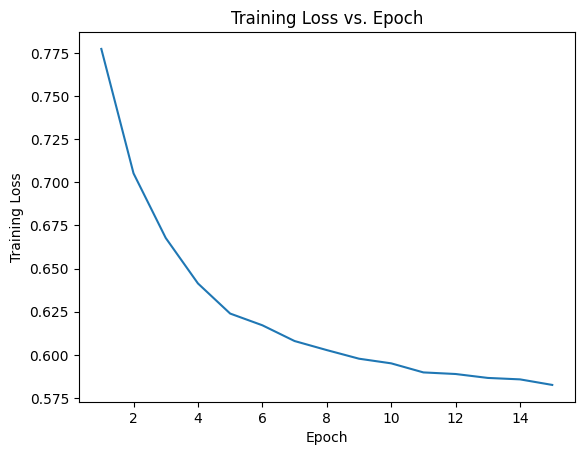

In [13]:
for epoch in range(num_epochs):
    model.fit_partial(interactions, epochs=1)
    train_predictions = model.predict(interactions.row, interactions.col)
    train_loss_epoch = np.mean(np.log(1 + np.exp(-train_predictions)))
    train_loss.append(train_loss_epoch)

# Plot training loss
plt.plot(range(1, num_epochs + 1), train_loss)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Epoch')
plt.show()

In [72]:
import pickle

# Save the trained model
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [35]:

# Number of top items to recommend
top_n = 10

# # Fit the model
# model.fit(interactions, epochs=10)
existing_users = filtered_data['visitorEmail'].unique()

# Create a mapping from user email to integer user ID
user_id_map = {email: i for i, email in enumerate(existing_users)}

# Map item IDs to integers
item_id_map = {item: i for i, item in enumerate(filtered_data['ad_id'].unique())}

for user in existing_users:
    # Get the items for which the user has not interacted
    user_interacted_items = filtered_data[filtered_data['visitorEmail'] == user]['ad_id'].unique()
    all_items = filtered_data['ad_id'].unique()
    items_to_recommend = np.setdiff1d(all_items, user_interacted_items)

    # Map user email to integer user ID
    user_id = user_id_map[user]

    # Map item IDs to integers
    items_to_recommend_ids = [item_id_map[item] for item in items_to_recommend]
    items_to_recommend = items_to_recommend[:5]
    items_to_recommend_ids = items_to_recommend_ids[:5]
    # print(user_id,items_to_recommend[:5], items_to_recommend_ids[:5])
    print(user_id, items_to_recommend)
    print((np.array([user_id]*len(items_to_recommend))),np.array(items_to_recommend_ids) )
    # Recommend items for the user
    recommendations = model.predict(
        user_ids=[0,0,0,0,0],
        item_ids=[25,1,8,6,4]
    )

    # Get top-N recommended items
    top_indices = np.argsort(recommendations)[::-1][:top_n]
    top_items = [items_to_recommend[index] for index in top_indices]

    # Print top-N recommended items for the user
    print(f"Top {top_n} recommended items for user {user}:")
    for index, item in enumerate(top_items):
        print(f"Item ID: {item}, Predicted Score: {recommendations[index]}")
    break

0 ['64d485d31b5d79c7433befa4' '64d4e66e3709c058de9809cb'
 '64d9aeef3709c058de980f64' '64d9af2b3709c058de980f7f'
 '64d9af4d3709c058de980f86']
[0 0 0 0 0] [25  1  8  6  4]
Top 10 recommended items for user promod@yopmail.com:
Item ID: 64d9af4d3709c058de980f86, Predicted Score: -0.947610080242157
Item ID: 64d9af2b3709c058de980f7f, Predicted Score: -0.6448208689689636
Item ID: 64d9aeef3709c058de980f64, Predicted Score: -0.6427831649780273
Item ID: 64d4e66e3709c058de9809cb, Predicted Score: -0.30243605375289917
Item ID: 64d485d31b5d79c7433befa4, Predicted Score: -0.12056739628314972
